@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Baseball Case Study

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

### Problem Statement

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

    Major League Baseball (MLB) is a professional baseball organization with a total of 30 teams in the United States and Canada. Established in 1903

Data from all 30 Major League Baseball teams from the 2014 season. This data set is useful for examining the relationships between wins, runs scored in a season, and a number of other Team statistics.

In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [397]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [398]:
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


    let's rename the columns, in order to have easy understandings of each column

In [399]:
data.rename(columns = {'W':'Wins', 'R':'Runs', 'AB':'At_Bats', 'H':'Hits', '2B':'Doubles', '3B':'Triples', 
                       'HR':'Home_Runs', 'BB':'Walks', 'SO':'Strikeouts', 'SB':'Stolen_Bases', 'RA':'Runs_Allowed', 
                       'ER':'Earned_Runs', 'CG':'Complete_Games', 'SHO':'Shutouts', 'SV':'Saves', 'E':'Errors'},inplace = True)

In [400]:
data.head()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Home_Runs,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,ERA,Complete_Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [130]:
data.columns

Index(['Wins', 'Runs', 'At_Bats', 'Hits', 'Doubles', 'Triples', 'Home_Runs',
       'Walks', 'Strikeouts', 'Stolen_Bases', 'Runs_Allowed', 'Earned_Runs',
       'ERA', 'Complete_Games', 'Shutouts', 'Saves', 'Errors'],
      dtype='object')

In [7]:
#Our column names are successfully changed

    Let's check our dataset dimension:

In [8]:
data.shape

(30, 17)

- Here, we can see that our dataset contains 30 rows and 17 columns

# This dataset contains the data of 30 teams in Major League Baseball (MLB), each row indicates 1 team


__________________
And we have 17 columns that are described below


## INPUT FEATURES:

 `Runs`                   : A player is awarded a run if he crosses the plate to score his team a run. When tallying runs scored, the way in which a player reached base is not considered. If a player reaches base by an error or a fielder's choice, as long as he comes around to score, he is still credited with a run. If a player enters the game as a pinch-runner and scores, he is also credited with a run.
 

 `At_Bats`               : An official at-bat comes when a batter reaches base via a fielder's choice, hit or an error (not including catcher's interference) or when a batter is put out on a non-sacrifice. (Whereas a plate appearance refers to each completed turn batting, regardless of the result.) Number of At Bats
 

 `Hits`                      :  A hit occurs when a batter strikes the baseball into fair territory and reaches base without doing so via an error or a fielder's choice. There are four types of hits in baseball: singles, doubles, triples and home runs. All four are counted equally when deciphering batting average. If a player is thrown out attempting to take an extra base (e.g., turning a single into a double), that still counts as a hit.
    
    
 `Doubles`               : A batter is credited with a double when he hits the ball into play and reaches second base without the help of an intervening error or attempt to put out another baserunner.
 
 
 `Triples`                 :    Often called "the most exciting play in baseball," a triple occurs when a batter hits the ball into play and reaches third base without the help of an intervening error or attempt to put out another baserunner.
 

 `Home_Runs`        : A home run occurs when a batter hits a fair ball and scores on the play without being put out or without the benefit of an error. In almost every instance of a home run, a batter hits the ball in the air over the outfield fence in fair territory.


 `Walks`                   : A walk (or base on balls) occurs when a pitcher throws four pitches out of the strike zone, none of which are swung at by the hitter. After refraining from swinging at four pitches out of the zone, the batter is awarded first base. In the scorebook, a walk is denoted by the letters BB.


 `Strikeouts`            : A strikeout occurs when a pitcher throws any combination of three swinging or looking strikes to a hitter. ... However, even if the batter reaches first base safely, the pitcher and the batter are still credited with a strikeout in the scorebook. In the scorebook, a strikeout is denoted by the letter K.


 `Stolen_Bases`      : A stolen base occurs when a baserunner advances by taking a base to which he isn't entitled. This generally occurs when a pitcher is throwing a pitch, but it can also occur while the pitcher still has the ball or is attempting a pickoff, or as the catcher is throwing the ball back to the pitcher
 
 
 


 `Runs_Allowed`      :  An inherited runner is any baserunner who is already on base when a relief pitcher enters the game. Any inherited runners who score against a relief pitcher are not charged to his ERA; however, there are a few statistics that take into account a pitcher's success at stranding runners on base.


 `Earned_Runs`       :    An earned run is any run that scores against a pitcher without the benefit of an error or a passed ball. Often, it is the judgment of the official scorer as to whether a specific run would've scored without the defensive mishap. If a pitcher exits a game with runners on base, any earned runs scored by those runners will count against him.


 `ERA`                      :   Earned run average represents the number of earned runs a pitcher allows per nine innings -- with earned runs being any runs that scored without the aid of an error or a passed ball. ERA is the most commonly accepted statistical tool for evaluating pitchers.


 `Colmplete_Games` :   A pitcher earns a complete game if he pitches the entire game for his team regardless of how long it lasts. If the game is shortened by rain or if it lasts into extra innings, it counts as a complete game if the pitcher was the only pitcher to record an appearance for his team.


`Shutouts`              :   A starting pitcher is credited with a shutout when he pitches the entire game for a team and does not allow the opposition to score. By definition, any pitcher who throws a shutout is also awarded a win. Because he recorded every out for his team and didn't allow a run, his team could only have won.


 `Saves`                   :   A save is awarded to the relief pitcher who finishes a game for the winning team, under certain circumstances. A pitcher cannot receive a save and a win in the same game.


 `Errors`                   :   A fielder is given an error if, in the judgment of the official scorer, he fails to convert an out on a play that an average fielder should have made. Fielders can also be given errors if they make a poor play that allows one or more runners to advance on the bases. A batter does not necessarily need to reach base for a fielder to be given an error. If he drops a foul ball that extends an at-bat, that fielder can also be assessed an error.

____________
## OUTPUT FEATURES:

##### `Wins`  : Number of predicted Wins [W]

_____________________

# Statistical Summary

Let's check whether we have null values in our dataset

In [9]:
data.isna().sum()

Wins              0
Runs              0
At_Bats           0
Hits              0
Doubles           0
Triples           0
Home_Runs         0
Walks             0
Strikeouts        0
Stolen_Bases      0
Runs_Allowed      0
Earned_Runs       0
ERA               0
Complete_Games    0
Shutouts          0
Saves             0
Errors            0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Wins            30 non-null     int64  
 1   Runs            30 non-null     int64  
 2   At_Bats         30 non-null     int64  
 3   Hits            30 non-null     int64  
 4   Doubles         30 non-null     int64  
 5   Triples         30 non-null     int64  
 6   Home_Runs       30 non-null     int64  
 7   Walks           30 non-null     int64  
 8   Strikeouts      30 non-null     int64  
 9   Stolen_Bases    30 non-null     int64  
 10  Runs_Allowed    30 non-null     int64  
 11  Earned_Runs     30 non-null     int64  
 12  ERA             30 non-null     float64
 13  Complete_Games  30 non-null     int64  
 14  Shutouts        30 non-null     int64  
 15  Saves           30 non-null     int64  
 16  Errors          30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage

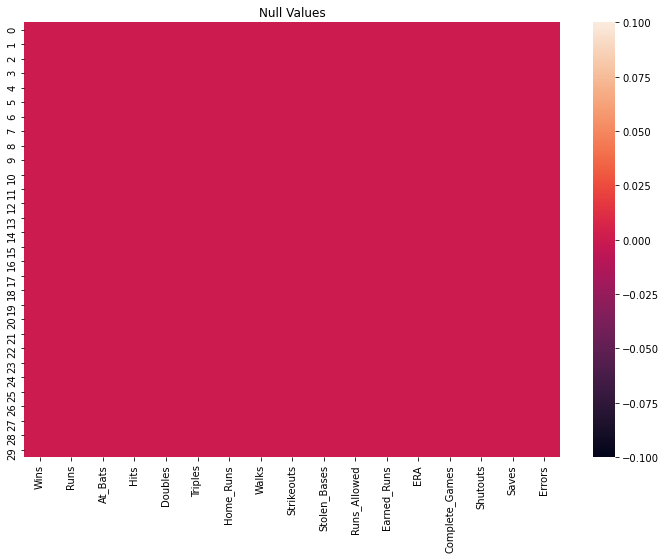

In [11]:
#Let's visualize to check the nullvalues in our dataset

plt.figure(figsize = [12,8])
sns.heatmap(data.isnull())
plt.title('Null Values')
plt.show()

##### Observation:
- We can clearly see that there is no null alues in our dataset

In [12]:
#lets check our column data types

data.dtypes

Wins                int64
Runs                int64
At_Bats             int64
Hits                int64
Doubles             int64
Triples             int64
Home_Runs           int64
Walks               int64
Strikeouts          int64
Stolen_Bases        int64
Runs_Allowed        int64
Earned_Runs         int64
ERA               float64
Complete_Games      int64
Shutouts            int64
Saves               int64
Errors              int64
dtype: object

##### Observation:
- Feature "ERA" is the only column with float values
- And rest all other features is of integer values

In [13]:
#Let's check the overall metrics of each column


data.describe()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Home_Runs,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,ERA,Complete_Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


We see that there is disturbancy comparatively in our Mean and Median in some of our columns

__________________________________

# EDA(Exploratory Data Analysis)

Let us explore our data and visualize it

### Univariate Analysis

Text(0.5, 1.0, 'Winning Prediction')

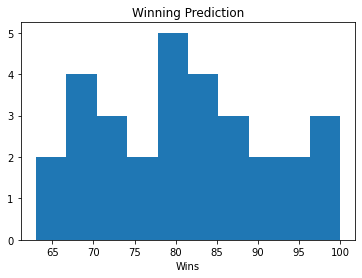

In [401]:
#Target column - Wins

plt.hist(data['Wins'])
plt.xlabel('Wins')
plt.title('Winning Prediction')

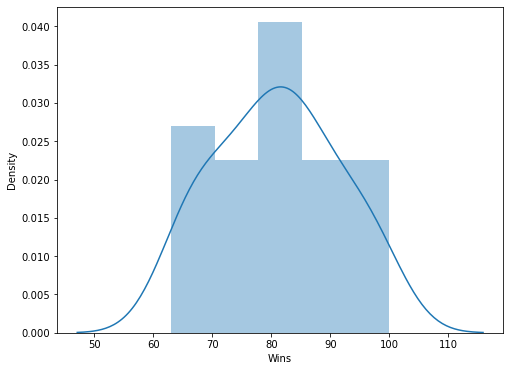

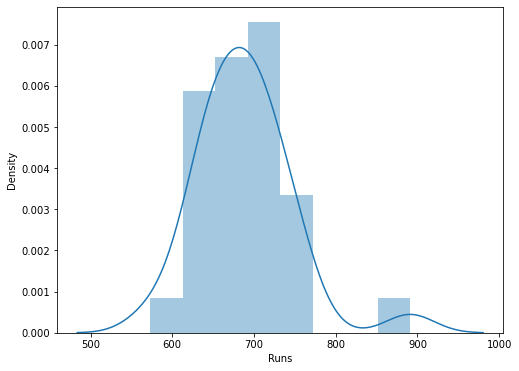

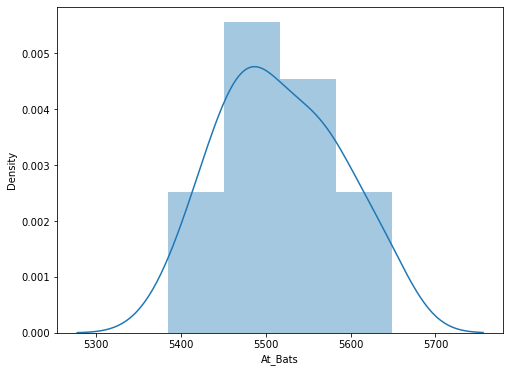

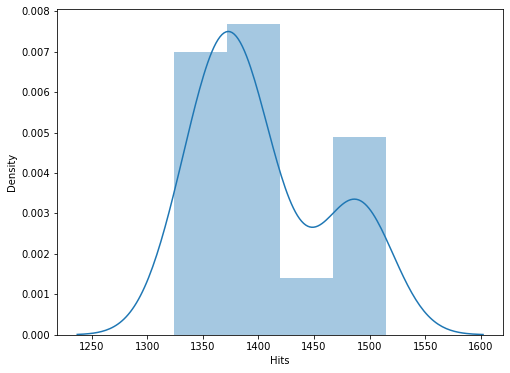

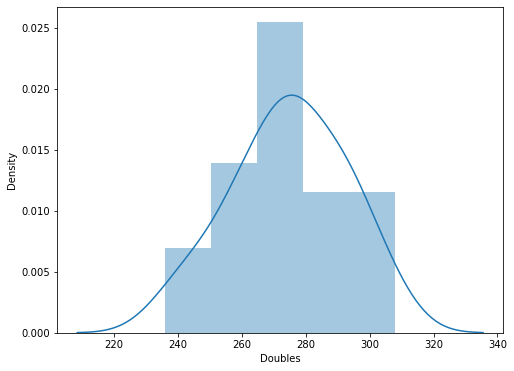

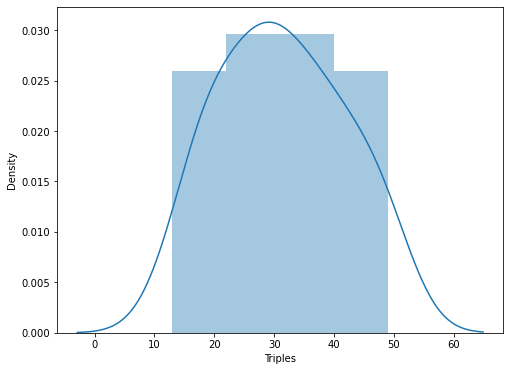

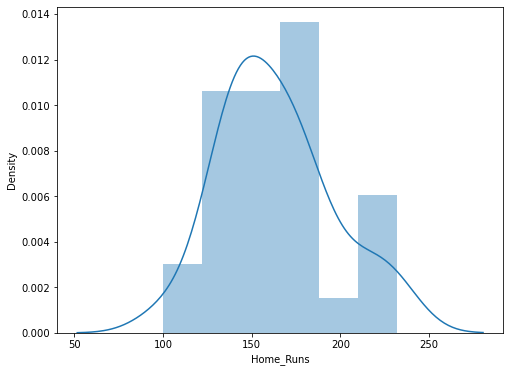

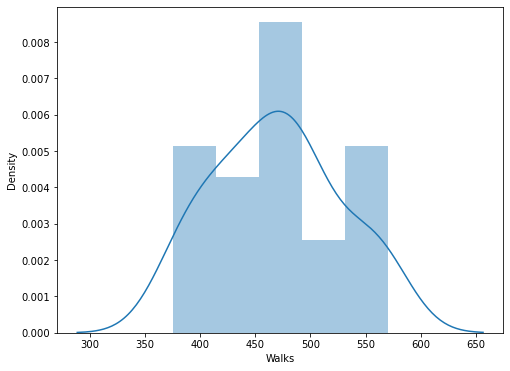

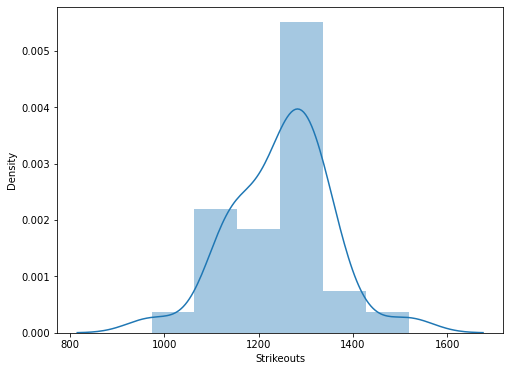

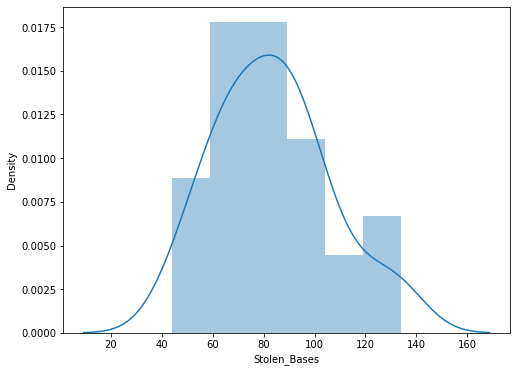

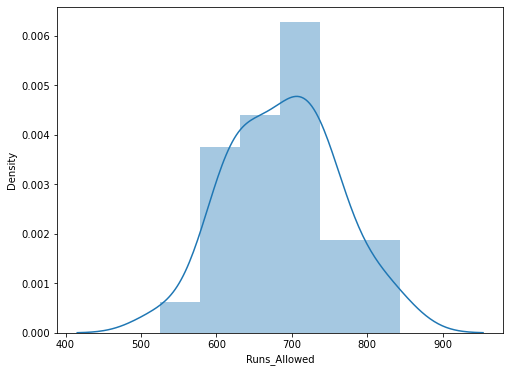

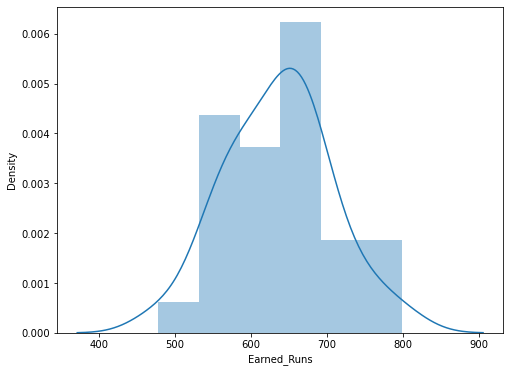

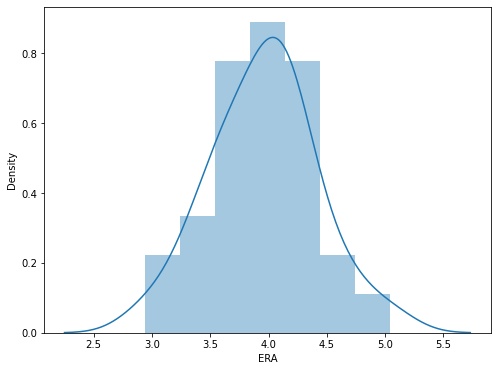

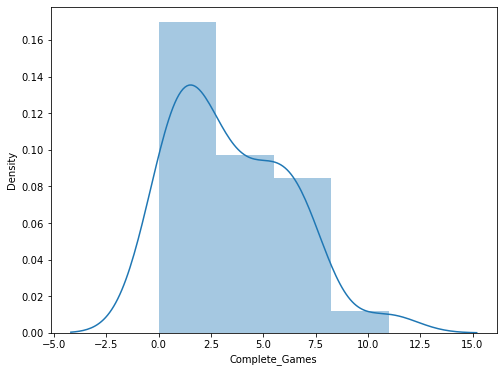

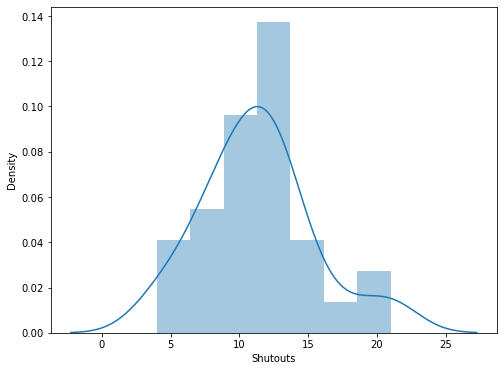

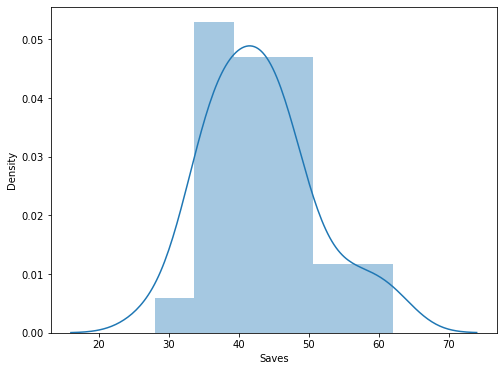

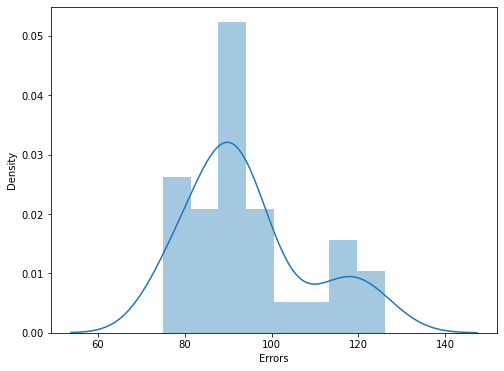

In [14]:
#Let's check for the How all our columns are distributed

for i in data.columns:
    plt.figure(figsize = (8,6))
    sns.distplot(data[i])

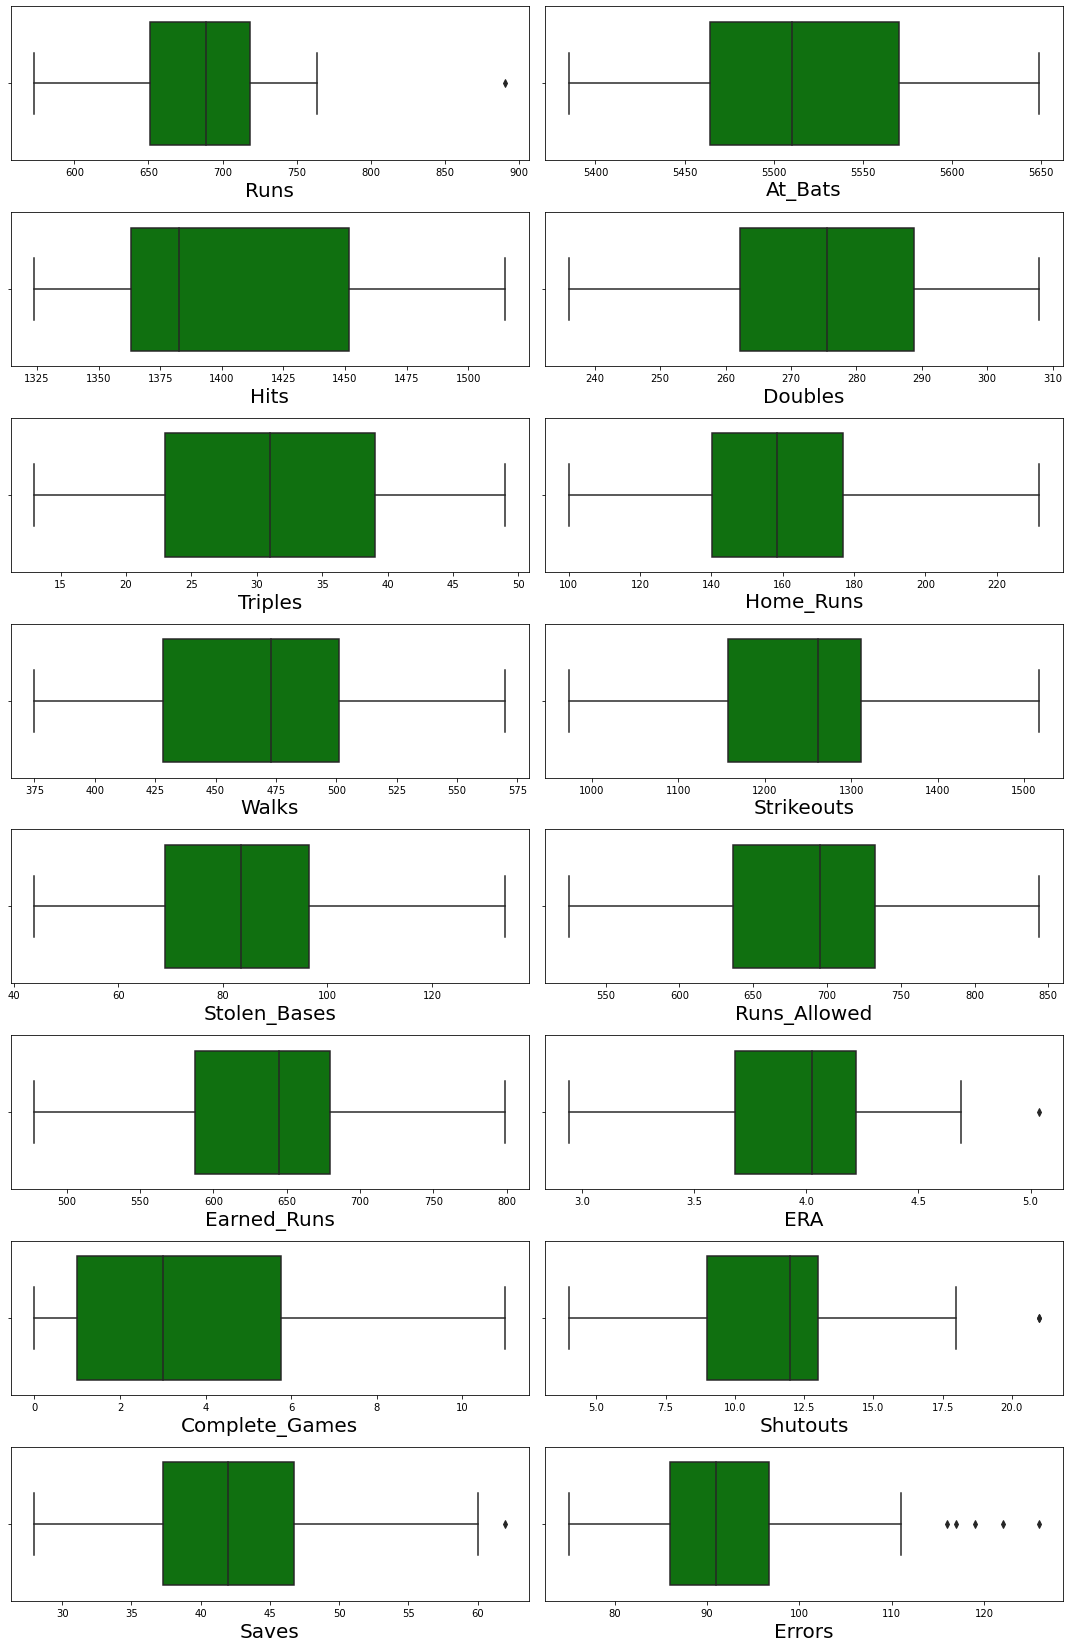

In [15]:
plt.figure(figsize = (15,23))
plotnumber = 1

for column in data.iloc[:,1:]: #let's visualize only the features columns 
    if plotnumber<=16:
        ax = plt.subplot(8,2,plotnumber)
        sns.boxplot(data[column],color = 'Green')
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.tight_layout()


#### Observation:
    - We could see some outliers in the following features
        Runs
        ERA
        Shutouts
        Saves
        Errors
    - Let's try removing the outliers with some techniques

## Bivariate Analysis

<AxesSubplot:title={'center':'At Bats vs Wins'}, xlabel='At_Bats', ylabel='Wins'>

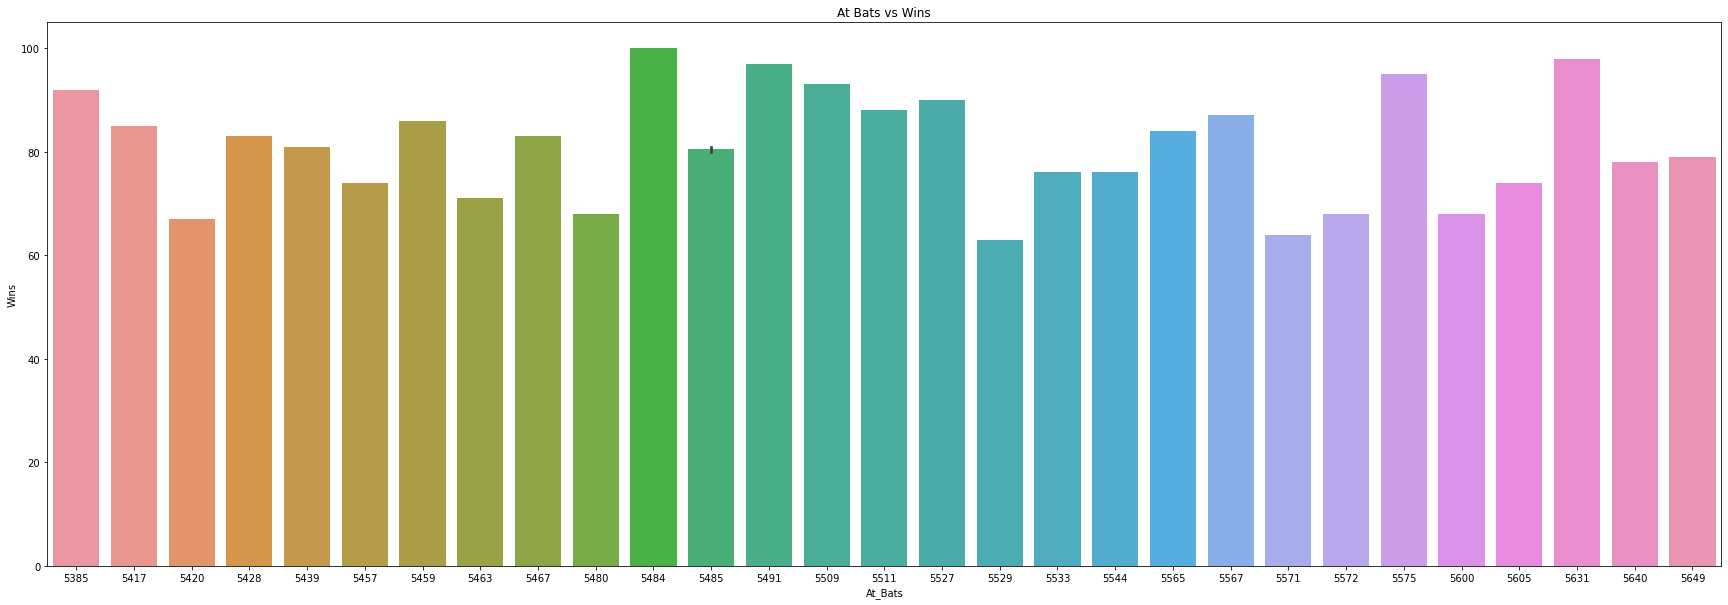

In [402]:
plt.figure(figsize=(30,10))
plt.title('At Bats vs Wins')
sns.barplot(x='At_Bats',y='Wins',data=data)

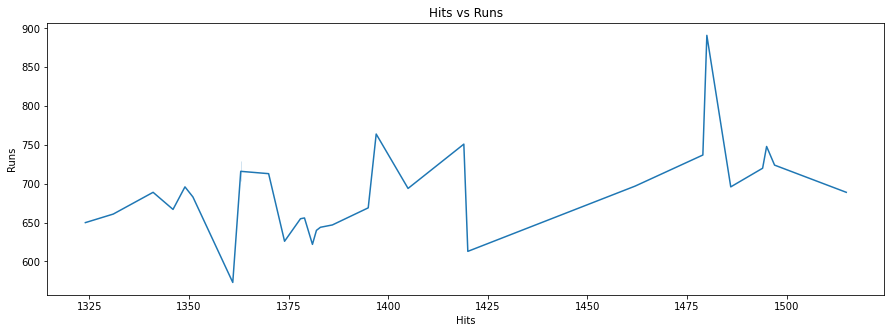

In [403]:
plt.figure(figsize=(15,5))
plt.title('Hits vs Runs')
sns.lineplot(x='Hits',y='Runs',data=data)
plt.show()

In [411]:
data[data['Runs'] ==891]

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Home_Runs,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,ERA,Complete_Games,Shutouts,Saves,Errors
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.8,7,10,34,88


#### Observation:
    - We can see that highest runs "891" were scored when the Number of Hits was "1480"
    - In the ranger of (1422 - 1477) as no. of hits were increasing the number of runs were also increasing

<AxesSubplot:title={'center':'Earned Runs vs Earned Runs Average'}, xlabel='Earned_Runs', ylabel='ERA'>

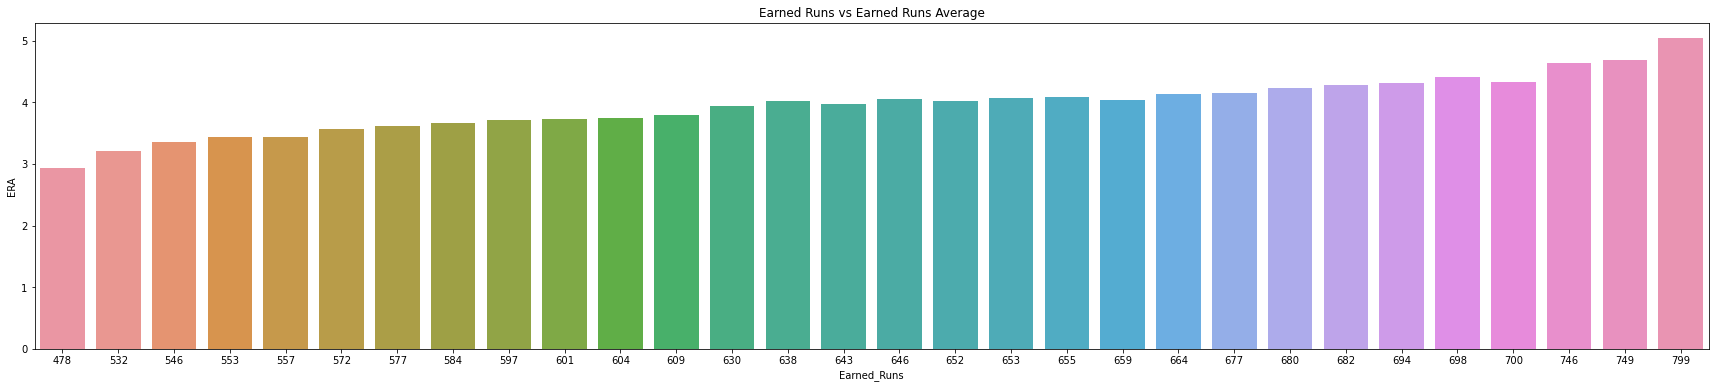

In [405]:
plt.figure(figsize=(30,6))
plt.title('Earned Runs vs Earned Runs Average')
sns.barplot(x='Earned_Runs',y='ERA',data=data)

#### Observation:
    - If the number of Runs earned increases then, the Earned Runs Average also increases
    - By this we can also say that our "Earned Runs" and "Earned Runs Average" data are consistent

## Multivariate Analysis

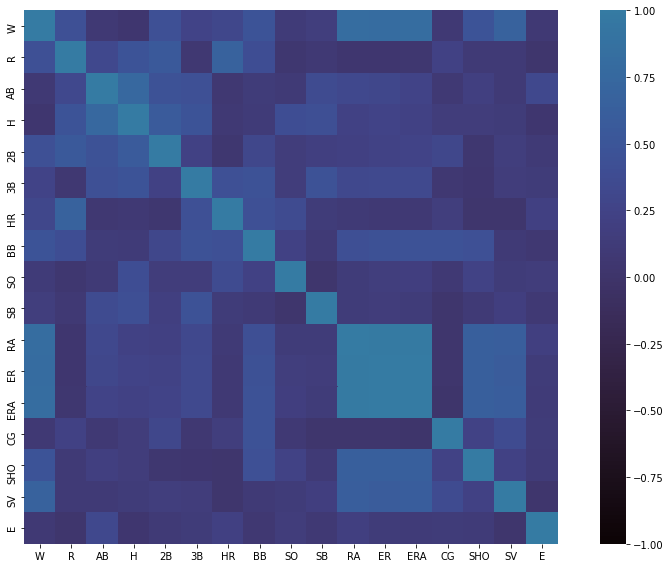

In [394]:
data_corr = data.corr().abs() #to get the correlation values

plt.figure(figsize=(12,8))
sns.heatmap(data_corr,vmin=-1,vmax=1,square=True,center=1,fmt='.1g',cmap='mako')

plt.tight_layout()

In [395]:
data.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


_____________________________________

## Removing Outliers and Skewness:

#### Applying IQR Method

In [325]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1

data_new1 = data[~((data < (Q1-1.5*IQR)) | (data> (Q3 + 1.5*Q3))).any(axis = 1)]

In [326]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new1.shape)
print('Percentage Loss'.ljust(20),":",(data.shape[0]-data_new1.shape[0])/data.shape[0])

Shape - Before and After:

Shape Before         : (30, 17)
Shape After          : (30, 17)
Percentage Loss      : 0.0


#### Applying z-score Method

In [327]:
#importing libraries

from scipy.stats import zscore

In [328]:
z=np.abs(zscore(data))
threshold = 3
data_new2 = data[(z<3).all(axis=1)]

In [329]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new2.shape)
print('Percentage Loss'.ljust(20),":",(data.shape[0]-data_new2.shape[0])/data.shape[0])

Shape - Before and After:

Shape Before         : (30, 17)
Shape After          : (29, 17)
Percentage Loss      : 0.03333333333333333


#### Observation:

    - We could see by the IQR method, there is no change in our dataset and the percentage loss is '0' that means IQR method has not removed any outliers

    - We could see by the Z-score method there is a change in our dataset from "(30, 17) to (29, 17)" and percentage loss is "0.03333333333333333" which is less loss, that means z-score method has helped us in removing some of the outliers

   ### Hence, we will proceed with z-score method

In [380]:
data = data_new2
data.shape #our new dimensions

(29, 17)

<AxesSubplot:>

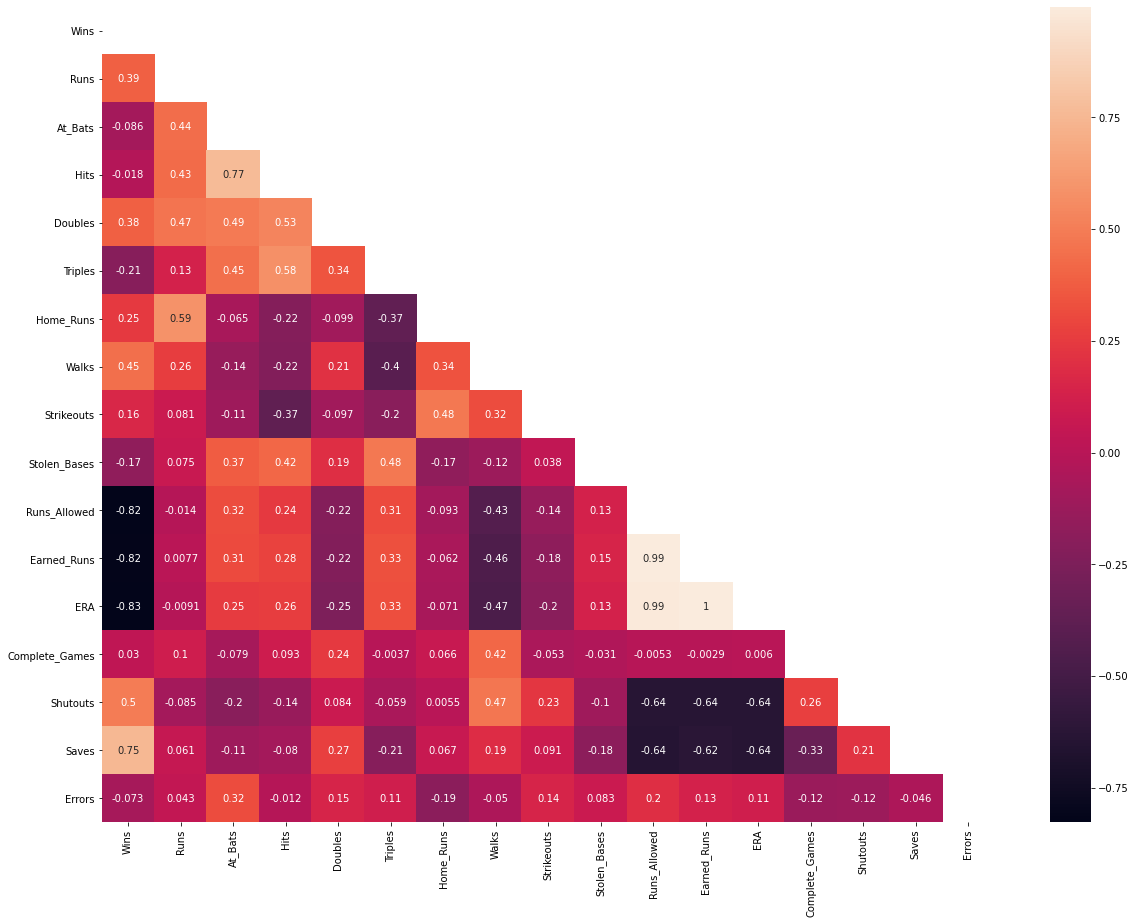

In [381]:
#correlation matrix
plt.figure(figsize=(20,15))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, mask=matrix)

### Skewness

let's check for our data skewness

In [331]:
data.skew()

Wins              0.119013
Runs             -0.215364
At_Bats           0.169573
Hits              0.783772
Doubles          -0.335304
Triples           0.090124
Home_Runs         0.450862
Walks             0.151193
Strikeouts       -0.233815
Stolen_Bases      0.494966
Runs_Allowed      0.018155
Earned_Runs       0.018461
ERA               0.016693
Complete_Games    0.854980
Shutouts          0.526943
Saves             0.627480
Errors            0.840271
dtype: float64

- We found that we still have some Skewness in the following features

#### Positive Skewness

`Hits`               :          0.783772
    
`Colmplete_Games`    :          0.854980

`Shutouts`           :          0.526943

`Saves`              :          0.627480
    
`Errors`             :          0.840271

- We have applied power transformation method but it has removed our complete 'Hits' column and now the complete value of each data is '0'

In [332]:
# Let's go for log transformation

df1 = data.copy()

In [333]:
for index in df1.skew().index:
    if df1.skew().loc[index]>0.55:
        df1[index] = np.cbrt(df1[index])

In [334]:
df1.skew()

Wins              0.119013
Runs             -0.215364
At_Bats           0.169573
Hits              0.753696
Doubles          -0.335304
Triples           0.090124
Home_Runs         0.450862
Walks             0.151193
Strikeouts       -0.233815
Stolen_Bases      0.494966
Runs_Allowed      0.018155
Earned_Runs       0.018461
ERA               0.016693
Complete_Games   -1.013981
Shutouts          0.526943
Saves             0.280963
Errors            0.671748
dtype: float64

#### Observation:
    - Applying cbrt transformation we were able to remove most of the slkewness, but we are still left with skewed data on the columns 'Hits' and 'Errors'


###### Let's remove the skewness by using power_transform


In [335]:
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer()
for i in df1.columns:
    if abs(df1.loc[:,i].skew())>0.55:
        df1.loc[:,i]=pt.fit_transform(df1.loc[:,i].values.reshape(-1,1))


In [336]:
df1.skew()

Wins              0.119013
Runs             -0.215364
At_Bats           0.169573
Hits              0.000000
Doubles          -0.335304
Triples           0.090124
Home_Runs         0.450862
Walks             0.151193
Strikeouts       -0.233815
Stolen_Bases      0.494966
Runs_Allowed      0.018155
Earned_Runs       0.018461
ERA               0.016693
Complete_Games   -0.196268
Shutouts          0.526943
Saves             0.280963
Errors            0.067626
dtype: float64

### Splitting Features and Labels

In [337]:
X = df1.drop(columns = 'Wins')
Y = df1['Wins']

In [338]:
#let's check for our dimensions after splitting the data

print('Features dimension:\t',X.shape,'\nLabel Dimension:\t',Y.shape)

Features dimension:	 (29, 16) 
Label Dimension:	 (29,)


- We can now see that features dimension contains 29 rows and 16 columns
- And our target data dimension as 29 rows and a single column(W - Wins)

## Scaling

We could see that there is a huge difference in data range between different columns data in our dataset. Hence, we need to scale the data.

##### let's use StandardScaler method to normalize the data


In [339]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

X_scaled = Scaler.fit_transform(X)

### Finding Best Random State

Let's find out the best Random State which can be used for all our models

In [340]:
from sklearn.linear_model import LinearRegression

maxR2_Score = 0
maxRS = 0

for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.20,random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    Score = r2_score(y_test,predrf)
    if Score>maxR2_Score:
        maxR2_Score = Score
        maxRS = i
        
print('The best accuracy is ',maxR2_Score, ' with Random State ',maxRS)

The best accuracy is  0.9625277603615014  with Random State  104


## Train Test Split

In [341]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled, Y, test_size =0.20, random_state = maxRS)

__________________

# Model Building

let's build multiple models and check for the best model by using the Cross_val_score metrics

### Model: Linear Regression

In [342]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred_lr = lr.predict(x_test)

In [343]:

print('R Squared (R2): ',r2_score(y_test, y_pred_lr))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,y_pred_lr))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,y_pred_lr))

R Squared (R2):  0.9625277603615014
Mean Squared Error (MSE):  4.668416521629613
Root Mean Squared Error (RMSE):  2.160651874233703
Mean Absolute Error (MAE):  1.8410688635926746


In [344]:
print('Cross validation Score: ', cross_val_score(lr,X_scaled,Y,cv=5).mean())

Cross validation Score:  0.15264210490787838


### Model: Random Forest Regressor

In [345]:
from sklearn.ensemble import RandomForestRegressor

rand = RandomForestRegressor()
rand.fit(x_train,y_train)

y_pred_rand = rand.predict(x_test)

In [346]:

print('R Squared (R2): ',r2_score(y_test, y_pred_rand))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,y_pred_rand))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, y_pred_rand)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,y_pred_rand))

R Squared (R2):  0.5735902341137122
Mean Squared Error (MSE):  53.12355000000002
Root Mean Squared Error (RMSE):  7.288590398698505
Mean Absolute Error (MAE):  5.738333333333337


In [347]:
print('Cross validation Score: ', cross_val_score(rand,X_scaled,Y,cv=5).mean())

Cross validation Score:  -0.7389209063171209


### Model: DecisionTreeRegressor

In [348]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

y_pred_dt = dt.predict(x_test)

In [349]:

print('R Squared (R2): ',r2_score(y_test, y_pred_dt))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,y_pred_dt))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,y_pred_dt))

R Squared (R2):  0.2267558528428094
Mean Squared Error (MSE):  96.33333333333333
Root Mean Squared Error (RMSE):  9.814954576223638
Mean Absolute Error (MAE):  7.666666666666667


In [350]:
print('Cross validation Score: ', cross_val_score(dt,X_scaled,Y,cv=5).mean())

Cross validation Score:  -2.879656521087957


### Model: KNeighbors Regressor

In [351]:
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor()
kn.fit(x_train,y_train)

y_pred_kn = kn.predict(x_test)

In [352]:
print('R Squared (R2): ',r2_score(y_test, y_pred_kn))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,y_pred_kn))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, y_pred_kn)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,y_pred_kn))

R Squared (R2):  0.6554916387959866
Mean Squared Error (MSE):  42.92000000000001
Root Mean Squared Error (RMSE):  6.551335741663681
Mean Absolute Error (MAE):  5.9333333333333345


In [353]:
print('Cross validation Score: ', cross_val_score(kn,X_scaled,Y,cv=5).mean())

Cross validation Score:  0.09620936395675961


### Model: Gradient Boosting Regressor

In [354]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)

y_pred_gb = gb.predict(x_test)

In [355]:
print('R Squared (R2): ',r2_score(y_test, y_pred_gb))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,y_pred_gb))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,y_pred_gb))

R Squared (R2):  0.4378892859853397
Mean Squared Error (MSE):  70.02962645432643
Root Mean Squared Error (RMSE):  8.368370597334133
Mean Absolute Error (MAE):  7.592026913016265


In [356]:
print('Cross validation Score: ', cross_val_score(gb,X_scaled,Y,cv=5).mean())

Cross validation Score:  -1.24720435654408


### Model: Ridge

In [357]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(x_train,y_train)

y_pred_ridge = ridge.predict(x_test)

In [358]:
print('R Squared (R2): ',r2_score(y_test, y_pred_ridge))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,y_pred_ridge))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,y_pred_ridge))

R Squared (R2):  0.9328893398525995
Mean Squared Error (MSE):  8.360869743363653
Root Mean Squared Error (RMSE):  2.8915168585646622
Mean Absolute Error (MAE):  2.396244475356179


In [359]:
print('Cross validation Score: ', cross_val_score(ridge,X_scaled,Y,cv=5).mean())

Cross validation Score:  0.37297492714079217


### Model: Lasso

In [360]:
from sklearn.linear_model import Lasso

Lasso = Lasso()
Lasso.fit(x_train,y_train)

y_pred_Lasso = Lasso.predict(x_test)

In [361]:
print('R Squared (R2): ',r2_score(y_test, y_pred_Lasso))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,y_pred_Lasso))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, y_pred_Lasso)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,y_pred_Lasso))

R Squared (R2):  0.824296055903792
Mean Squared Error (MSE):  21.889783035319255
Root Mean Squared Error (RMSE):  4.678651839506681
Mean Absolute Error (MAE):  4.037183860971716


In [362]:
print('Cross validation Score: ', cross_val_score(Lasso,X_scaled,Y,cv=5).mean())

Cross validation Score:  0.4662204371646457


### Model: SVR

In [366]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train,y_train)

y_pred_svr = svr.predict(x_test)

In [367]:
print('R Squared (R2): ',r2_score(y_test, y_pred_svr))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,y_pred_svr))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, y_pred_svr)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,y_pred_svr))

R Squared (R2):  0.15772257248201538
Mean Squared Error (MSE):  104.93372951161558
Root Mean Squared Error (RMSE):  10.243716586845595
Mean Absolute Error (MAE):  9.690785576198813


In [368]:
print('Cross validation Score: ', cross_val_score(svr,X_scaled,Y,cv=5).mean())

Cross validation Score:  -0.2896710232812404


## Finding the best model

In [375]:
#R2 score of all the models
R1 = r2_score(y_test, y_pred_lr)
R2 = r2_score(y_test, y_pred_rand)
R3 = r2_score(y_test, y_pred_dt)
R4 = r2_score(y_test, y_pred_kn)
R5 = r2_score(y_test, y_pred_gb)
R6 = r2_score(y_test, y_pred_ridge)
R7 = r2_score(y_test, y_pred_Lasso)
R8 = r2_score(y_test, y_pred_svr)

#Cross Validation Score of all the models
C1 = cross_val_score(lr,X_scaled,Y,cv=5).mean()
C2 = cross_val_score(rand,X_scaled,Y,cv=5).mean()
C3 = cross_val_score(dt,X_scaled,Y,cv=5).mean()
C4 = cross_val_score(kn,X_scaled,Y,cv=5).mean()
C5 = cross_val_score(gb,X_scaled,Y,cv=5).mean()
C6 = cross_val_score(ridge,X_scaled,Y,cv=5).mean()
C7 = cross_val_score(Lasso,X_scaled,Y,cv=5).mean()
C8 = cross_val_score(svr,X_scaled,Y,cv=5).mean()

In [376]:
Overall_Score = pd.DataFrame({'Model':['Linear Regression','Random Forest Regressor','Decision Tree','KNeighbors Regressor','Gradient Boosting Regressor','Ridge','Lasso','SVR'],'R2_Score':[R1,R2,R3,R4,R5,R6,R7,R8],'Cross_Validation_Score':[C1,C2,C3,C4,C5,C6,C7,C8]})
Overall_Score['Difference'] = Overall_Score['R2_Score'] - Overall_Score['Cross_Validation_Score']

In [377]:
Overall_Score

,Model,R2_Score,Cross_Validation_Score,Difference
0,Linear Regression,0.962528,0.152642,0.809886
1,Random Forest Regressor,0.573590,-0.519832,1.093423
2,Decision Tree,0.226756,-2.395163,2.621919
3,KNeighbors Regressor,0.655492,0.096209,0.559282
4,Gradient Boosting Regressor,0.437889,-1.359040,1.796930
5,Ridge,0.932889,0.372975,0.559914
6,Lasso,0.824296,0.466220,0.358076
7,SVR,0.157723,-0.289671,0.447394


### Observation:
    - All the Cross_Validation_Score as negative (-ve) is not a good model, so, we should not select them

In [464]:
Overall_Score['Difference'].min()

0.3580756187391463

In [465]:
Overall_Score[Overall_Score['Difference']==0.3580756187391463]

,Model,R2_Score,Cross_Validation_Score,Difference
6,Lasso,0.824296,0.46622,0.358076


    Here, if we check as per the R2_Score then, Linear Regression is the best model, but if we go with less difference 
    between r2 score and cross validation score, we will find, 'Lasso' as our best model. 

## Hence, Our best model is 'Lasso'

- And let's proceed further with hyper parameter tuning for our Best Model(Lasso)

## Hyper Parameter Tuning

In [451]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03],'fit_intercept':[True],'random_state':range(1,10),
              'max_iter':[10,100,1000,10000],'copy_X':[True],}

gridsearch=GridSearchCV(estimator = Lasso(), param_grid = param_grid,scoring='r2',cv=5)     

gridsearch.fit(x_train,y_train)
print(gridsearch.best_score_, gridsearch.best_params_)

0.13598630496686925 {'alpha': 0.03, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10, 'random_state': 1}


In [452]:
from sklearn.linear_model import Lasso

Lasso_final = Lasso(alpha = 0.03, fit_intercept = True, max_iter = 10,copy_X=True,
                    random_state= 1)

Lasso_final.fit(x_train,y_train)

y_pred = Lasso_final.predict(x_test)

## Before Tuning:

,Actual,Predictions
25,92,87.662770
19,64,70.988275
23,67,70.879832
20,90,89.622860
13,76,77.957518
10,88,81.316892


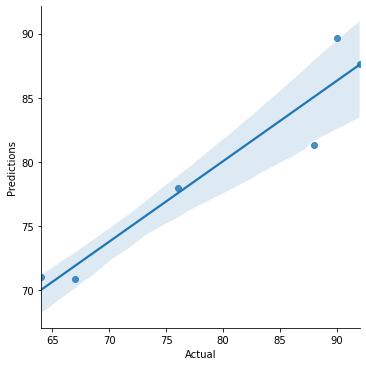

In [453]:

data_view1 = pd.DataFrame({'Actual':y_test , 'Predictions':y_pred_Lasso},columns=['Actual','Predictions'])
sns.lmplot(x='Actual',y='Predictions',data=data_view1,palette='rainbow')
data_view1

## After Tuning:

,Y Test,Pred
25,92,89.014188
19,64,65.641178
23,67,66.811337
20,90,88.218873
13,76,77.521503
10,88,82.871272


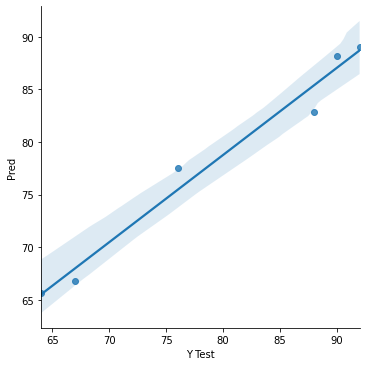

In [454]:

data_view2 = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data_view2,palette='rainbow')
data_view2

### Performance Metrix:

In [456]:
print('R Squared (R2): ',r2_score(y_test, y_pred))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,y_pred))

R Squared (R2):  0.9418924835060517
Mean Squared Error (MSE):  7.239228096537725
Root Mean Squared Error (RMSE):  2.690581367760084
Mean Absolute Error (MAE):  2.2078351490178414


### Saving the Model

In [458]:
import joblib
joblib.dump(Lasso_final,'BaseBall_Predictions.obj')

['BaseBall_Predictions.obj']

_________________________________________